In [37]:
from nomad import config
from nomad.metainfo import units
# this will not be necessary, once this is the official NOMAD version
config.keycloak.realm_name = 'fairdi_nomad_prod'
config.client.url = 'http://labdev-nomad.esc.rzg.mpg.de/dev/nomad/v0-8-0/api'

In [38]:
from nomad.client import query_archive
import matplotlib.pyplot as plt

In [39]:
aq = query_archive(
    query=dict(
        upload_id=['6LUBCju3T3KK3D_fRCJ4qw']
    ),
    query_schema={
        'section_run': {
            'section_single_configuration_calculation[0]': {
                'energy_total': '*'
            }          
        }
    }, 
    per_page=100)

print('total', len(aq))

for i, e in enumerate(aq):
    if i % 200 == 0:
        print(e.section_run[0].section_single_configuration_calculation[0].energy_total)

print(aq)

total 2398
-6.3339730261331896e-18 joule
-4.659124213884504e-18 joule
-3.565286105415546e-18 joule
-5.224154429803029e-18 joule
-5.101457492113138e-18 joule
-3.633056874464142e-18 joule
-3.624966508913506e-18 joule
-3.3598866411664673e-18 joule
-3.468433199685816e-18 joule
-4.36251215133456e-18 joule
-4.958605717107583e-18 joule
-4.3751765068705374e-18 joule
Number queries entries: 2398
Number of entries loaded in the last api call: 98
Bytes loaded in the last api call: 33836
Bytes loaded from this query: 827857
Number of downloaded entries: 2398



In [40]:
aq[0].m_to_dict()

{'section_run': [{'section_single_configuration_calculation': [{'energy_total': -6.3339730261331896e-18}]}]}

In [41]:
aq = query_archive(
    query=dict(
        quantities=['section_dos']
    ),
    per_page=1)
entry = aq[0]

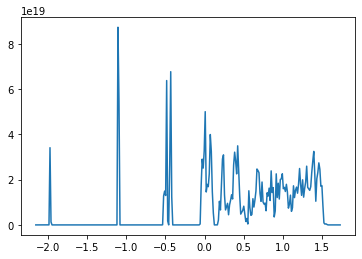

In [42]:
run = entry.section_run[0]
dos = run.section_single_configuration_calculation[-1].section_dos[0]
plt.plot(dos.dos_energies.to(units.hartree).m, dos.dos_values[0])

In [43]:
next(system for system in run.section_system if system.is_representative).chemical_composition_bulk_reduced

'O3SrTi'